In [2]:
import numpy as np
import prtools as pr
import matplotlib.pyplot as plt

## 4.7 Hierarchical Clustering

Goal: construct dendogram based on:
- Dissimilarity measure (e.g. Euclidean)
- Linkage type (complete, single, average)

Stopping criteria: 1 cluster left.

Once the dendogram has been constructed, we need to cut it at an appropriate level to obtain a clustering.

140 by 2 prdataset with 1 class: [140]


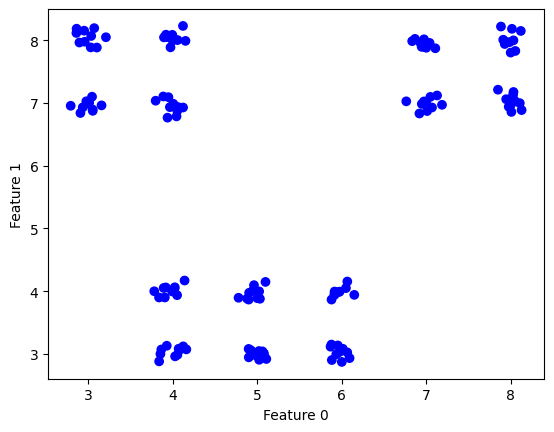

In [3]:
ds = pr.read_mat('hall')    # artificial data set with clear structure
print(ds)
pr.scatterd(ds)

# Below we see 14 clusters at finest level, but organized into 3 larger clusters.
# The appropriate number of clusters depends on the application.

Below we will hierarchically cluster the `rnd` dataset which does not have a clear structure, to get an idea of what the dendodram looks like.

200 by 2 prdataset with 1 class: [200]


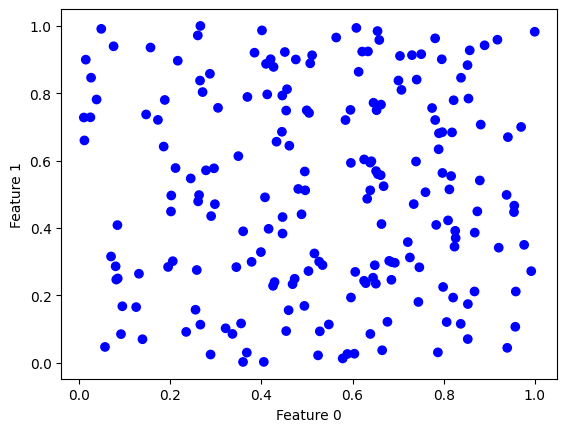

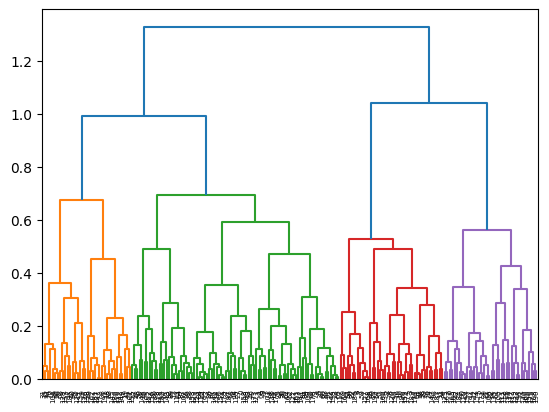

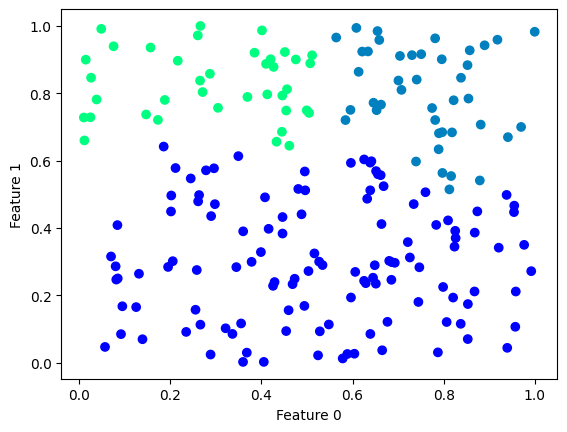

In [14]:
ds = pr.read_mat('rnd') # ds with no clear structure
print(ds)   
pr.scatterd(ds)

# Plot dendogram with complete linkage
pr.dendro(+ds, 'complete')

# Obtain distance/dissimilarity matrix D to pass to hclust
D = ds * pr.proxm(ds, ('eucl'))   # other distances: 'city' ...

# Perform hierarchical clustering with complete linkage
lab = pr.hclust(D, 'complete', 3)   # obtain 3 clusters
# NOTE: complete and avg linkage lead to round clusters, whereas single linkage is good for elongated clusters

# Relabel original data with new labels
ds_new = pr.prdataset(+ds, lab)
pr.scatterd(ds_new)

Perform hierarchical clustering on the `hall` dataset - having clear structure.

What do the lengths of the vertical stems in the dendogram tell us about the clustering?

140 by 2 prdataset with 1 class: [140]


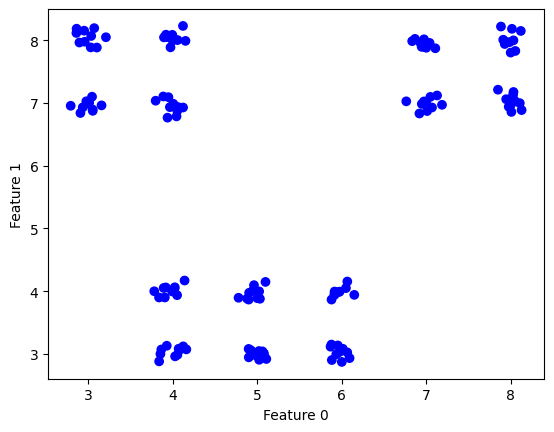

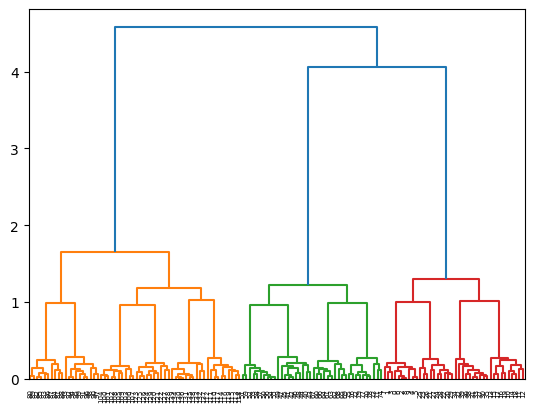

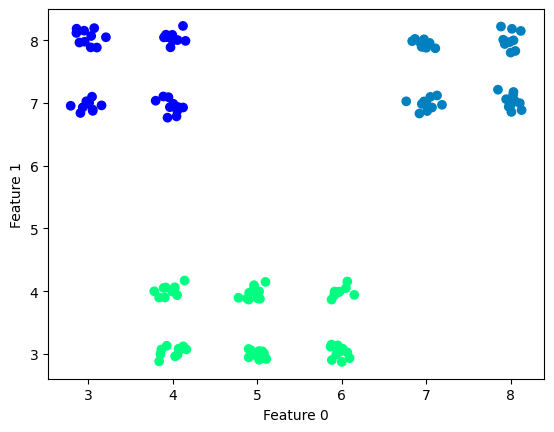

In [24]:
ds = pr.read_mat('hall')  
print(ds)
pr.scatterd(ds)

# Plot dendogram with complete linkage
# NOTE: long stems in the dendogram indicate large distances between clusters, i.e. good point to cut
# NOTE: in single linkage, we can clearly distinguish 2 different stem lengths
pr.dendro(+ds, 'average')

# Obtain distance/dissimilarity matrix D to pass to hclust
D = ds * pr.proxm(ds, ('eucl'))   # other distances: 'city' ...

# Perform hierarchical clustering with complete linkage
lab = pr.hclust(D, 'average', 3)   # obtain 3 clusters, i.e. cut the dendogram at height 3

# Relabel original data with new labels
ds_new = pr.prdataset(+ds, lab)
pr.scatterd(ds_new)


## 4.8 Clustering with a mixture-of-Gaussians

Using the EM-algorithm, we iteratively estimate the parameters of the mixture model.

1350.8954708594788


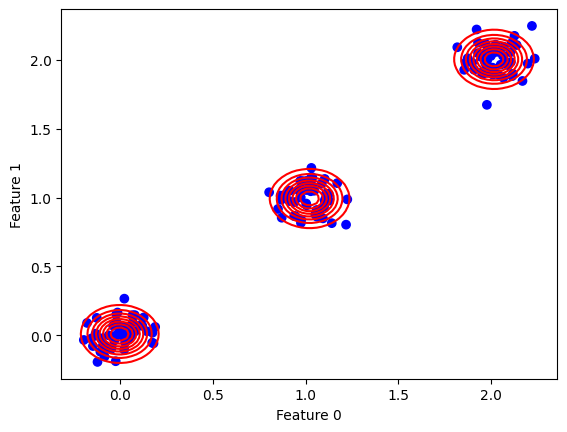

In [48]:
ds = pr.read_mat('triclust')

# Perform EM
# The trained mapping outputs a probability density for each of the mixture components
# In the case k=3, each x will return a vector of 3 probabilities, one for each cluster to possibly assign to
w = pr.mog(ds, (3, 'sphr', 0.001)) # k, shape of covariance matrix (full, diag, sphr), regularization parameter for inverse covariance matrix

pr.scatterd(ds)
pr.plotm(w, nrlevels=10, colors='r', gridsize=100)   # plot the estimates

# Compute the (log-)likelihood of some dataset by first summing the probabilities of all clusters
# then take the log and add all log-probabilities of the full dataset
pred = ds * w
logL = np.sum(np.log(np.sum(+pred, axis=1)))
print(logL)

498.406688717701


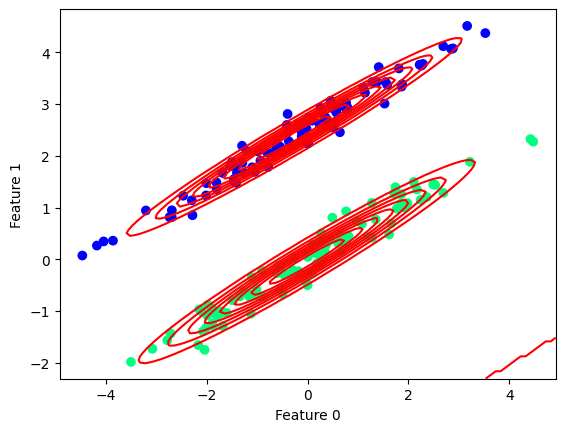

In [47]:
ds = pr.read_mat('cigars')

# Perform EM
# The trained mapping outputs a probability density for each of the mixture components
# In the case k=3, each x will return a vector of 3 probabilities, one for each cluster to possibly assign to
w = pr.mog(ds, (2, 'full', 0.001)) # k, shape of covariance matrix (full, diag, sphr), regularization parameter for inverse covariance matrix

pr.scatterd(ds)
pr.plotm(w, nrlevels=10, colors='r', gridsize=100)   # plot the estimates

# Compute the (log-)likelihood of some dataset by first summing the probabilities of all clusters
# then take the log and add all log-probabilities of the full dataset
pred = ds * w
logL = np.sum(np.log(np.sum(+pred, axis=1)))
print(logL)

1573.2553224910912


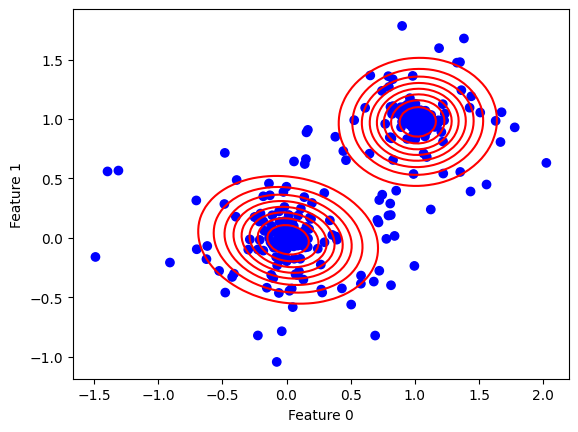

In [49]:
ds = pr.read_mat('messy')

# Perform EM
# The trained mapping outputs a probability density for each of the mixture components
# In the case k=3, each x will return a vector of 3 probabilities, one for each cluster to possibly assign to
w = pr.mog(ds, (2, 'full', 0.001)) # k, shape of covariance matrix (full, diag, sphr), regularization parameter for inverse covariance matrix

pr.scatterd(ds)
pr.plotm(w, nrlevels=10, colors='r', gridsize=100)   # plot the estimates

# Compute the (log-)likelihood of some dataset by first summing the probabilities of all clusters
# then take the log and add all log-probabilities of the full dataset
pred = ds * w
logL = np.sum(np.log(np.sum(+pred, axis=1)))
print(logL)

## 4.9 Cluster Validation

### Fusion Graphs

- Plots the fusion level as a function of the number of clusters $g$
- Simple heuristic to determine the no. of clusters in hierarchical clustering: cut dendogram at the point where we observe a large jump
    - This implies that 2 clusters were merged that were actually quite far apart (relative to other clusters) 

In [16]:
ds = pr.read_mat('triclust')

# Obtain distance/dissimilarity matrix D to pass to hclust
D = ds * pr.proxm(ds, ('eucl'))   # other distances: 'city' ...

# Perform hierarchical clustering with complete linkage
lab = pr.hclust(D, 'single', 2)   # obtain 3 clusters, i.e. cut the dendogram at height 3

# Plot fusion graph (and dendogram): where do you observe the largest jump in distance? Between K = 2 and K = 3
# NOTE: in the case of complete linkage, the optimal no. of clusters is less pronounced than in the case of single linkage
# You can check this by setting K = 2 and comparing distances between cluster means and and data points for both methods
pr.fusion_graph(+ds, 'single')

# Relabel original data with new labels
ds_new = pr.prdataset(+ds, lab)
pr.scatterd(ds_new)

The example belows shows that there can be multiple jumps in the fusion graph.

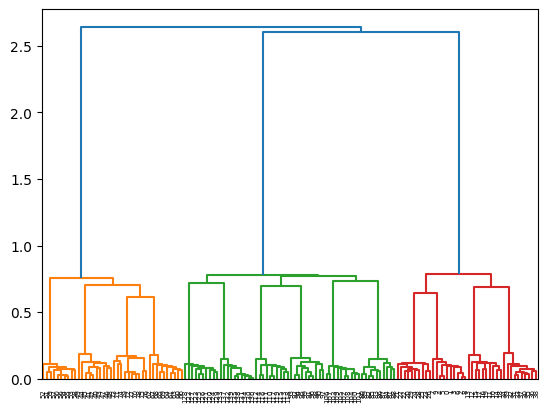

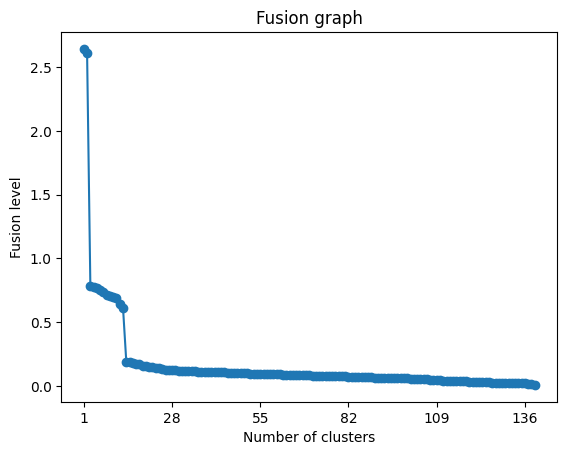

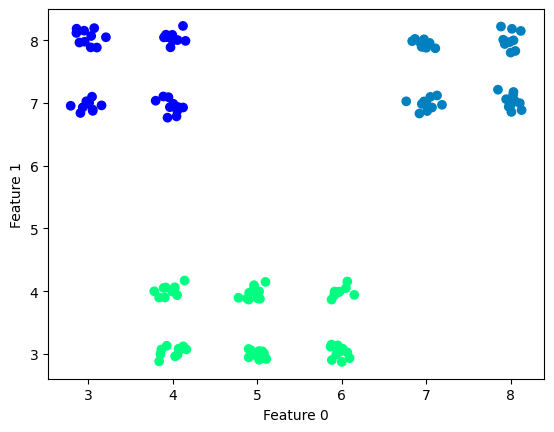

In [3]:
ds = pr.read_mat('hall')


# Obtain distance/dissimilarity matrix D to pass to hclust
D = ds * pr.proxm(ds, ('eucl'))   # other distances: 'city' ...

# Perform hierarchical clustering with complete linkage
lab = pr.hclust(D, 'single', 3)   # obtain 3 clusters, i.e. cut the dendogram at height 3

# Plot fusion graph (and dendogram): where do you observe the largest jump in distance? Between K = 2 and K = 3
pr.fusion_graph(+ds, 'single')

# Relabel original data with new labels
ds_new = pr.prdataset(+ds, lab)
pr.scatterd(ds_new)

In the example below, we should cut the dendogram at $g = 3$ (at 3 clusters) since the largest jump occurs between 2 and 3.

However, this does not lead to a satisfactory clustering when using `single linkage`... 2 of the 3 clusters are essentially constituted of outliers of the main cluster...

We can see that `complete linkage` on the other hand, is much less sensitive to outliers!

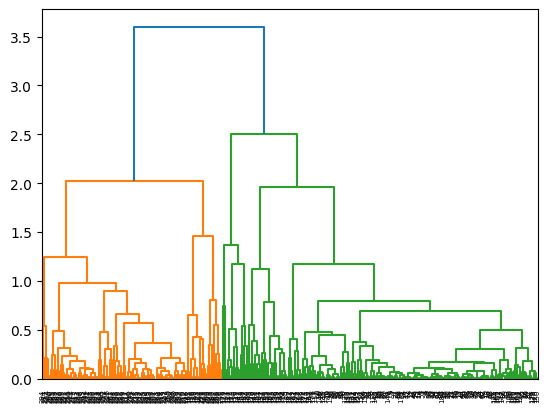

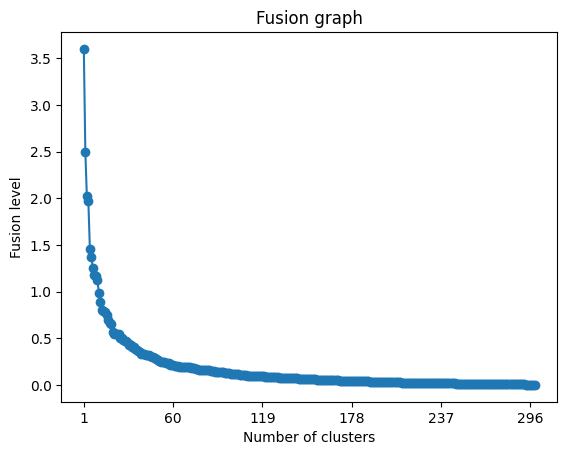

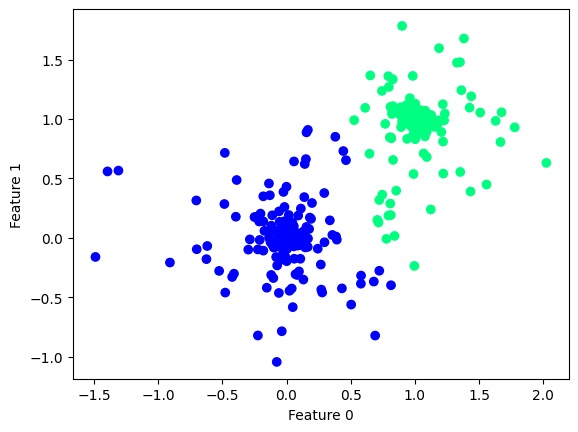

In [8]:
ds = pr.read_mat('messy')

# Obtain distance/dissimilarity matrix D to pass to hclust
D = ds * pr.proxm(ds, ('eucl'))   # other distances: 'city' ...

# Perform hierarchical clustering with complete linkage
lab = pr.hclust(D, 'complete', 2)   # obtain 3 clusters, i.e. cut the dendogram at height 3

# Plot fusion graph (and dendogram): where do you observe the largest jump in distance? Between K = 2 and K = 3
pr.fusion_graph(+ds, 'complete')

# Relabel original data with new labels
ds_new = pr.prdataset(+ds, lab)
pr.scatterd(ds_new)

### The Davies-Bouldin Index